## Lectura de Fuente desde Kaggle

In [1]:
!kaggle datasets download -d chuckyin/iris-datasets

Dataset URL: https://www.kaggle.com/datasets/chuckyin/iris-datasets
License(s): unknown
iris-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import zipfile
import os

with zipfile.ZipFile('iris-datasets.zip', 'r') as zip_ref:
    zip_ref.extractall('G:\Mi unidad\Personal\Desarrollos Personales\Iris\Modelado')

<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\avila\AppData\Local\Temp\ipykernel_14136\969066431.py:5: SyntaxWarning: invalid escape sequence '\M'
  zip_ref.extractall('G:\Mi unidad\Personal\Desarrollos Personales\Iris\Modelado')


## Visualizacion de la Base

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('G:\Mi unidad\Personal\Desarrollos Personales\Iris\Modelado\Iris.csv')
data

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\avila\AppData\Local\Temp\ipykernel_14136\2445348408.py:1: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv('G:\Mi unidad\Personal\Desarrollos Personales\Iris\Modelado\Iris.csv')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Dummies para categorias

In [5]:
data_dummie = pd.get_dummies(data['Species'], prefix='CLASS', drop_first = True).astype(int)
data = pd.concat([data, data_dummie], axis = 1)
data = data.drop(['Id'], axis = 1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,CLASS_Iris-versicolor,CLASS_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,1
146,6.3,2.5,5.0,1.9,Iris-virginica,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,0,1
148,6.2,3.4,5.4,2.3,Iris-virginica,0,1


## Exploracion (Comportamiento de las variables)

In [6]:
import seaborn as sns

## Matriz de Correlacion
data_num = data.drop('Species', axis = 1)
CM = data_num.corr()
CM

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,CLASS_Iris-versicolor,CLASS_Iris-virginica
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.079396,0.638020
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.464700,-0.130901
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.201587,0.721102
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.118376,0.769134
CLASS_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,1.000000,-0.500000
CLASS_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,1.000000


<Axes: >

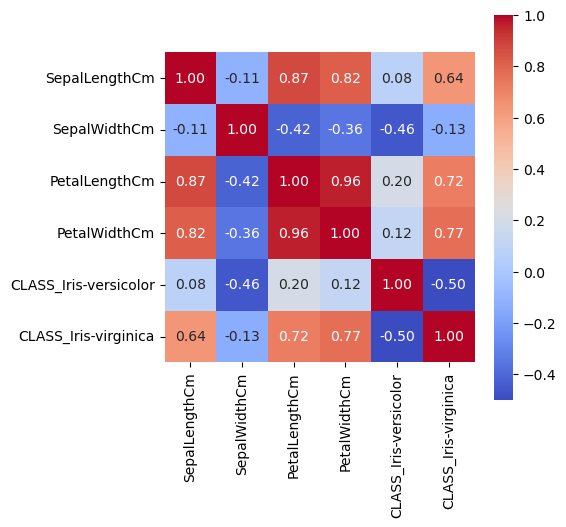

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(CM, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar={'shrink:.8'})

## Scatter de Longitud de Petalos Frente a Ancho de Petalos y longitud de Sepalos

Text(0, 0.5, 'Largo de Sepalo')

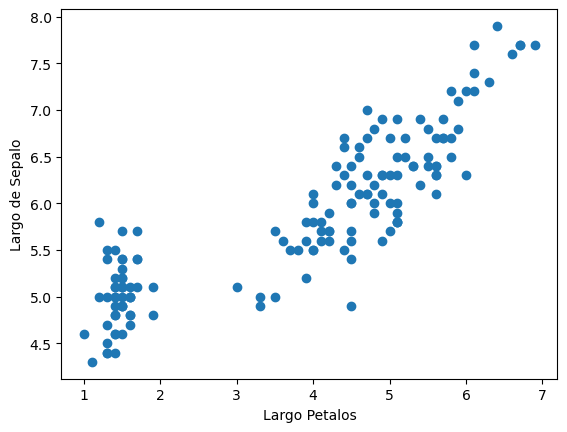

In [8]:
plt.scatter(data['PetalLengthCm'], data['SepalLengthCm'])
plt.xlabel('Largo Petalos')
plt.ylabel('Largo de Sepalo')

In [9]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(0, 0.5, 'Largo de Sepalo')

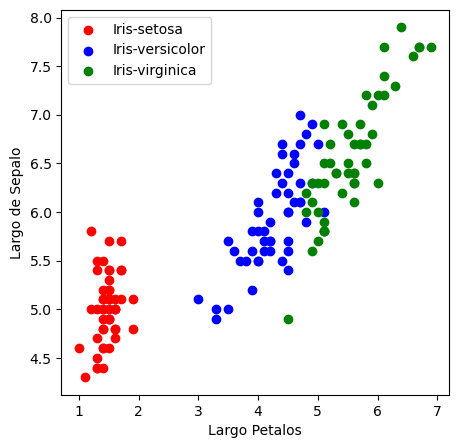

In [10]:
color_class = {'Iris-setosa': 'red',
               'Iris-versicolor': 'blue',
               'Iris-virginica': 'green'}

plt.figure(figsize = (5,5))

for clase, color in color_class.items():
    sub = data[data['Species'] == clase]
    plt.scatter(sub['PetalLengthCm'], sub['SepalLengthCm'], label=clase, color = color)
plt.legend()
plt.xlabel('Largo Petalos')
plt.ylabel('Largo de Sepalo')

Text(0, 0.5, 'Largo de Sepalo')

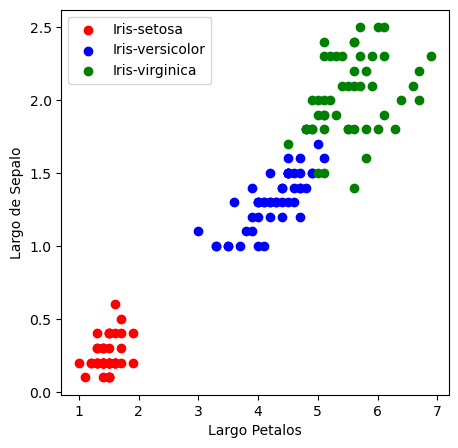

In [13]:
color_class = {'Iris-setosa': 'red',
               'Iris-versicolor': 'blue',
               'Iris-virginica': 'green'}

plt.figure(figsize = (5,5))

for clase, color in color_class.items():
    sub = data[data['Species'] == clase]
    plt.scatter(sub['PetalLengthCm'], sub['PetalWidthCm'], label=clase, color = color)
plt.legend()
plt.xlabel('Largo Petalos')
plt.ylabel('Largo de Sepalo')

## Seleccion de variables con mayor correlacion con Largo de Petalos

In [25]:
import numpy as np

CM_UNPIVOT = CM.reset_index(drop=False)
CM_UNPIVOT = CM_UNPIVOT.melt(id_vars='index', value_vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'CLASS_Iris-versicolor', 'CLASS_Iris-virginica'])
CM_UNPIVOT = CM_UNPIVOT[CM_UNPIVOT['value'] != 1]
CM_UNPIVOT = CM_UNPIVOT[CM_UNPIVOT['value'] >= 0.75]
CM_UNPIVOT = CM_UNPIVOT[CM_UNPIVOT['index'] == 'PetalLengthCm']

final_list = np.array(CM_UNPIVOT['variable'])
final_list

array(['SepalLengthCm', 'PetalWidthCm'], dtype=object)

## Modelo de Regresion Prediccion Longitud de Petalo

### Identificacion de Linealidad

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[final_list]
Y = data['PetalLengthCm']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [34]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)
y_pred

array([4.54916989, 5.87131207, 5.8052518 , 3.79240916, 1.32590106,
       4.88431785, 4.20722042, 1.20058204, 1.20058204, 3.56217567,
       6.27252029, 1.8524283 , 3.7263489 , 5.1806116 , 6.7465903 ,
       5.86451055, 1.8524283 , 0.97034855, 4.25967765, 1.60859178,
       1.67465205, 4.54916989, 1.43761705, 4.9435766 , 1.6153933 ,
       1.79316955, 2.13511902, 4.98923232, 6.57561556, 1.55613455])

### Metricas de Linealidad

In [36]:
r2 = r2_score(y_test, y_pred)
r2

0.9530372053623573

In [38]:
mse = mean_squared_error(y_test, y_pred)
mse

0.16572700599677762

### Intervalos de Confianza

In [42]:
## Calculo de residuales
R = y_test - y_pred
R_std_error = np.std(R)
R_std_error

0.40642147929487604

In [43]:
## Para error del 0.05
z = 1.96
lower = y_pred - z * R_std_error
upper = y_pred + z * R_std_error

lower, upper

(array([3.75258379, 5.07472597, 5.0086657 , 2.99582306, 0.52931496,
        4.08773175, 3.41063432, 0.40399594, 0.40399594, 2.76558957,
        5.47593419, 1.0558422 , 2.9297628 , 4.3840255 , 5.9500042 ,
        5.06792445, 1.0558422 , 0.17376245, 3.46309155, 0.81200568,
        0.87806595, 3.75258379, 0.64103095, 4.1469905 , 0.8188072 ,
        0.99658345, 1.33853292, 4.19264622, 5.77902946, 0.75954845]),
 array([5.34575599, 6.66789817, 6.6018379 , 4.58899526, 2.12248716,
        5.68090395, 5.00380652, 1.99716814, 1.99716814, 4.35876177,
        7.06910639, 2.6490144 , 4.52293499, 5.9771977 , 7.5431764 ,
        6.66109665, 2.6490144 , 1.76693465, 5.05626375, 2.40517788,
        2.47123815, 5.34575599, 2.23420314, 5.7401627 , 2.4119794 ,
        2.58975565, 2.93170512, 5.78581842, 7.37220166, 2.35272065]))

In [44]:
for pred, low, up in zip(y_pred, lower, upper):
    print(pred, low, up)

4.549169890862057 3.7525837914441 5.345755990280014
5.8713120680942 5.074725968676243 6.667898167512157
5.805251802347559 5.008665702929602 6.601837901765516
3.792409161125 2.995823061707043 4.588995260542957
1.325901058906784 0.5293149594888269 2.122487158324741
4.884317850360338 4.087731750942381 5.680903949778295
4.207220416365825 3.410634316947868 5.003806515783782
1.2005820424114537 0.4039959429934967 1.9971681418294107
1.2005820424114537 0.4039959429934967 1.9971681418294107
3.5621756731281953 2.7655895737102383 4.358761772546153
6.272520293339122 5.475934193921165 7.069106392757079
1.8524283006470355 1.0558422012290785 2.6490144000649924
3.7263488953783592 2.9297627959604022 4.522934994796316
5.180611604103783 4.384025504685826 5.97719770352174
6.746590299328636 5.950004199910679 7.543176398746593
5.864510553096247 5.06792445367829 6.661096652514204
1.8524283006470355 1.0558422012290785 2.6490144000649924
0.9703485544146484 0.1737624549966914 1.7669346538326054
4.259677652116563

### DataFrame Regresion Lineal

In [52]:
max(data['PetalWidthCm'])*(1.2)

3.0

In [68]:
var_obj_1 = data['SepalLengthCm']
M1 = max(var_obj_1)
M1 = M1*(1.2)
m1 = min(var_obj_1)*0.8

var_obj_2 = data['PetalWidthCm']
M2 = max(var_obj_2)
M2 = M2*(1.2)
m2 = min(var_obj_2)*0.8

LINE_1 = []
LINE_2 = []
LINE_3 = []
for i in np.arange(m1, M1, 0.05):
    for j in np.arange(m2, M2, 0.05):
        x1_val = i
        x2_val = j
        df = pd.DataFrame({'SepalLengthCm': [x1_val],
                           'PetalWidthCm': [x2_val]})
        y_val = model.predict(df)
        LINE_1.append(y_val[0])
        LINE_2.append(x1_val)
        LINE_3.append(x2_val)

pd.DataFrame({'PetalLengthCm': LINE_1,
              'SepalLengthCm': LINE_2,
              'PetalWidthCm' : LINE_3})

,PetalLengthCm,SepalLengthCm,PetalWidthCm
0,0.426528,3.44,0.08
1,0.512016,3.44,0.13
2,0.597503,3.44,0.18
3,0.682990,3.44,0.23
4,0.768478,3.44,0.28
...,...,...,...
7134,8.598371,9.44,2.78
7135,8.683859,9.44,2.83
7136,8.769346,9.44,2.88
7137,8.854833,9.44,2.93


In [58]:
df

,SepalLengthCm,PetalWidthCm
0,0.01,0.01


In [47]:
x_test

,SepalLengthCm,PetalWidthCm
72,6.3,1.5
112,6.8,2.1
132,6.4,2.2
88,5.6,1.3
37,4.9,0.1
138,6.0,1.8
87,6.3,1.3
42,4.4,0.2
8,4.4,0.2
90,5.5,1.2


### Modelo Random Forest